# Plot for synthetic datasets

## Homogeneous missingness

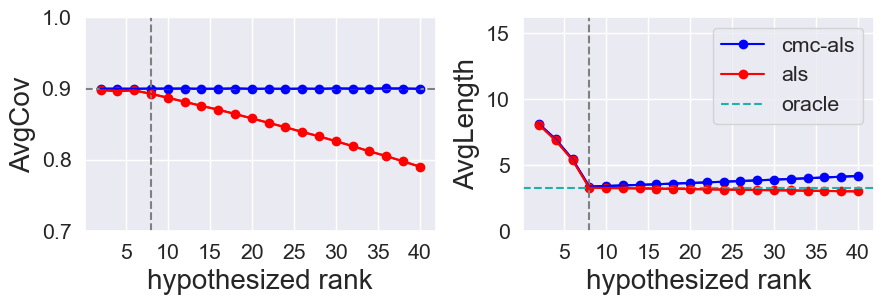

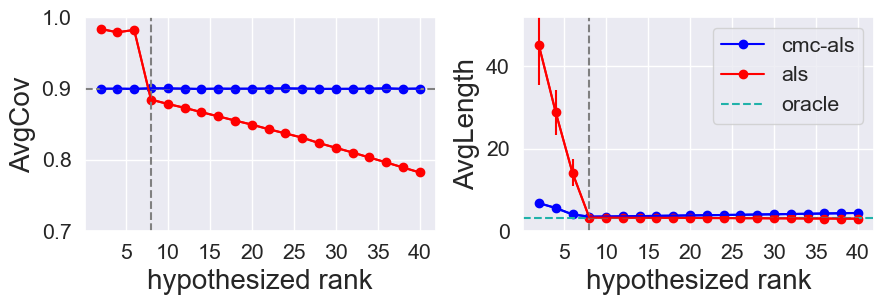

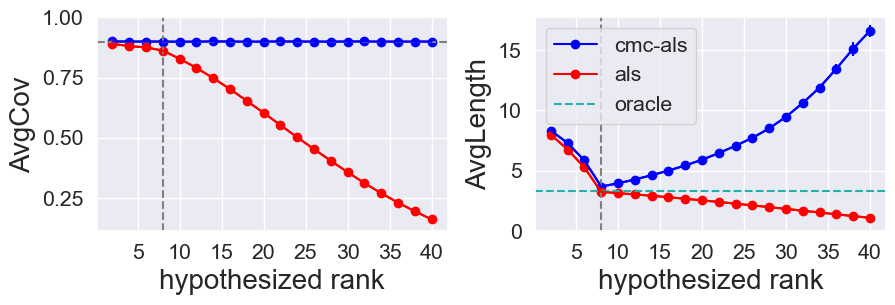

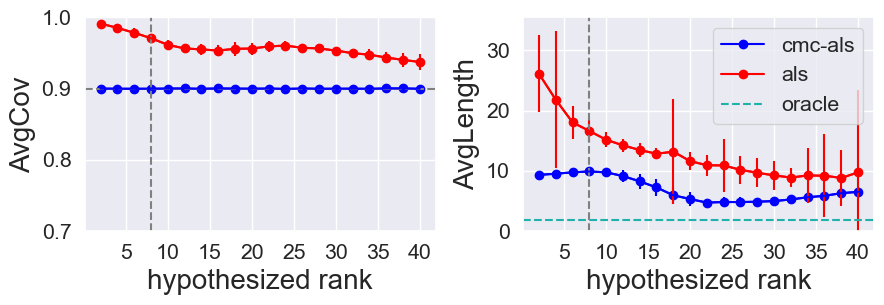

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# plot
alpha = 0.1
sd0 = 1
het = 'homo' # 'homo' | 'logis' | 'rank1'
base1 = 'cvx'
base2 = 'als'
repN = 100
sigma_true=False
full_exp = False
k_star = 8
if full_exp:
    rk_seq = range(4,25,4)
    rk_x = 1
else:
    rk_seq = range(2,41,2)
    rk_x = 3

for d in [500]:
    d1 = d2 = d
    for pr0 in [0.8]:
        for mis_set in [0,1,2,3]:
            if mis_set==2:
                pr = 0.2
            else:
                pr = pr0
            if mis_set==3:
                tail='t'
                sd = 0.2
            else:
                tail='gaussian'
                sd = sd0
            cov_conf = np.zeros(len(rk_seq))
            cov_conf_hat = np.zeros(len(rk_seq))
            cov_als = np.zeros(len(rk_seq))
            cov_cvx = np.zeros(len(rk_seq))
            len_conf = np.zeros(len(rk_seq))
            len_conf_hat = np.zeros(len(rk_seq))
            len_als = np.zeros(len(rk_seq))
            len_cvx = np.zeros(len(rk_seq))

            sd_cov_conf = np.zeros(len(rk_seq))
            sd_cov_conf_hat = np.zeros(len(rk_seq))
            sd_cov_als = np.zeros(len(rk_seq))
            sd_cov_cvx = np.zeros(len(rk_seq))
            sd_len_conf = np.zeros(len(rk_seq))
            sd_len_conf_hat = np.zeros(len(rk_seq))
            sd_len_als = np.zeros(len(rk_seq))
            sd_len_cvx = np.zeros(len(rk_seq))
            for i_rk in range(len(rk_seq)):
                rk = rk_seq[i_rk]
                file_dir1 = '../results/cov_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+str(rk)+'_'+het+'_'+str(sd)+'_'+tail+'_'+str(pr)+'_'+str(sigma_true)+'_'+str(full_exp)+'.csv'
                file_dir2 = '../results/len_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+str(rk)+'_'+het+'_'+str(sd)+'_'+tail+'_'+str(pr)+'_'+str(sigma_true)+'_'+str(full_exp)+'.csv'
                cov_df = pd.read_csv(file_dir1)
                len_df = pd.read_csv(file_dir2)


                label1 = 'cmc-'+base1
                label2 = 'cmc-'+base2
                label3 = base1
                label4 = base2
                label5 = ''
                
                if full_exp:
                    nam_ = [label1]*repN + [label2]*repN + [label3]*repN + [label4]*repN 
                else:
                    nam_ = [label2]*repN + [label4]*repN 
                cov_df['approach'] = nam_
                len_df['approach'] = nam_

                cov_conf_hat[i_rk] = cov_df[cov_df['approach']==label2].mean(axis=0)[0]
                cov_als[i_rk] = cov_df[cov_df['approach']==label4].mean(axis=0)[0]
                sd_cov_conf_hat[i_rk] = cov_df[cov_df['approach']==label2].sem(axis=0)[0]*np.sqrt(repN)
                sd_cov_als[i_rk] = cov_df[cov_df['approach']==label4].sem(axis=0)[0]*np.sqrt(repN)

                len_conf_hat[i_rk] = len_df[len_df['approach']==label2].mean(axis=0)[0]
                len_als[i_rk] = len_df[len_df['approach']==label4].mean(axis=0)[0]
                sd_len_conf_hat[i_rk] = len_df[len_df['approach']==label2].sem(axis=0)[0]*np.sqrt(repN)
                sd_len_als[i_rk] = len_df[len_df['approach']==label4].sem(axis=0)[0]*np.sqrt(repN)
                ymax = max(len_conf_hat+len_als)
    
                if full_exp:
                    cov_conf[i_rk] = cov_df[cov_df['approach']==label1].mean(axis=0)[0]
                    cov_cvx[i_rk] = cov_df[cov_df['approach']==label3].mean(axis=0)[0]
                    sd_cov_conf[i_rk] = cov_df[cov_df['approach']==label1].sem(axis=0)[0]*np.sqrt(repN)
                    sd_cov_cvx[i_rk] = cov_df[cov_df['approach']==label3].sem(axis=0)[0]*np.sqrt(repN)
                    len_conf[i_rk] = len_df[len_df['approach']==label1].mean(axis=0)[0]
                    len_cvx[i_rk] = len_df[len_df['approach']==label3].mean(axis=0)[0]
                    sd_len_conf[i_rk] = len_df[len_df['approach']==label1].sem(axis=0)[0]*np.sqrt(repN)
                    sd_len_cvx[i_rk] = len_df[len_df['approach']==label3].sem(axis=0)[0]*np.sqrt(repN)
                    ymax = max(len_cvx)*2.5


            fig, ax = plt.subplots(ncols=2,figsize=(9,3))     
            fig.tight_layout(pad=1)
            sns.set(font_scale = 1.4)

            col_seq=['orange','blue','green','red']
            if mis_set==2:
                cov_min=min(min(cov_als)*0.7,1-alpha)
            else:
                cov_min=0.7

            ax[0].plot(range(len(rk_seq)), cov_conf_hat, marker='o', label=label2, c=col_seq[1])
            ax[0].errorbar(range(len(rk_seq)), cov_conf_hat, yerr = sd_cov_conf_hat, c=col_seq[1])
            ax[0].plot(range(len(rk_seq)), cov_als, marker='o', label=label4, c=col_seq[3])
            ax[0].errorbar(range(len(rk_seq)), cov_als, yerr = sd_cov_als, c=col_seq[3])
            if full_exp:
                ax[0].plot(range(len(rk_seq)), cov_conf, marker='o', label=label1, c=col_seq[0])
                ax[0].errorbar(range(len(rk_seq)), cov_conf, yerr = sd_cov_conf, c=col_seq[0])
                ax[0].plot(range(len(rk_seq)), cov_cvx, marker='o', label=label3, c=col_seq[2])
                ax[0].errorbar(range(len(rk_seq)), cov_cvx, yerr = sd_cov_cvx, c=col_seq[2])
                ax[0].set_xticks([0.25,1.5,2.75,4],[5,10,15,20])
            else:
                ax[0].set_xticks([1.5,4,6.5,9,11.5,14,16.5,19],[5,10,15,20,25,30,35,40])
            ax[0].set_ylim((cov_min,1))
            ax[0].set_xlabel('hypothesized rank',fontsize=20)
            ax[0].set_ylabel('AvgCov',fontsize=20)
            ax[0].axvline(x = rk_x, color = 'grey', linestyle = '--')
            ax[0].axhline(y = 1-alpha, color = 'grey', linestyle = '--')

            ax[1].plot(range(len(rk_seq)), len_conf_hat, marker='o', label=label2, c=col_seq[1])
            ax[1].errorbar(range(len(rk_seq)), len_conf_hat, yerr = sd_len_conf_hat, c=col_seq[1])
            ax[1].plot(range(len(rk_seq)), len_als, marker='o', label=label4, c=col_seq[3])
            ax[1].errorbar(range(len(rk_seq)), len_als, yerr = sd_len_als, c=col_seq[3])
            if full_exp:         
                ax[1].plot(range(len(rk_seq)), len_conf, marker='o', label=label1, c=col_seq[0])
                ax[1].errorbar(range(len(rk_seq)), len_conf, yerr = sd_len_conf, c=col_seq[0])
                ax[1].plot(range(len(rk_seq)), len_cvx, marker='o', label=label3, c=col_seq[2])
                ax[1].errorbar(range(len(rk_seq)), len_cvx, yerr = sd_len_cvx, c=col_seq[2])
                ax[1].set_xticks([0.25,1.5,2.75,4],[5,10,15,20])
            else:
                ax[1].set_xticks([1.5,4,6.5,9,11.5,14,16.5,19],[5,10,15,20,25,30,35,40])
            ax[1].set_xlabel('hypothesized rank',fontsize=20)
            ax[1].set_ylabel('AvgLength',fontsize=20)
            ax[1].set_ylim((0,ymax))
            ax[1].axvline(x = rk_x, color = 'grey', linestyle = '--')
            
            if tail=='gaussian':
                oracle_len = scipy.stats.norm.ppf(1-alpha/2,0,sd)
            elif tail=='t':
                oracle_len = sd * scipy.stats.t.ppf(1-alpha/2,1.2)
            ax[1].axhline(y = 2*oracle_len, color = 'lightseagreen', linestyle = '--', label='oracle')
            ax[1].legend(loc='best',ncol=1)

            plot_dir = '../plot_paper/plot_rk_'+str(int(100*alpha))+'_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+het+'_'+tail+'_'+str(int(10*pr))+'_'+str(sigma_true)+'_'+str(full_exp)+'.pdf'
            plt.savefig(plot_dir, bbox_inches='tight')

## Heterogeneous

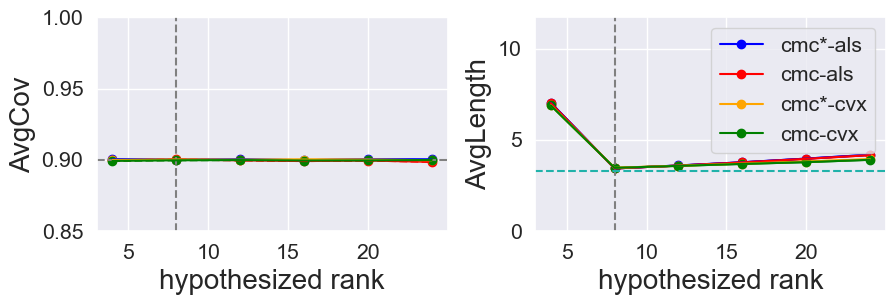

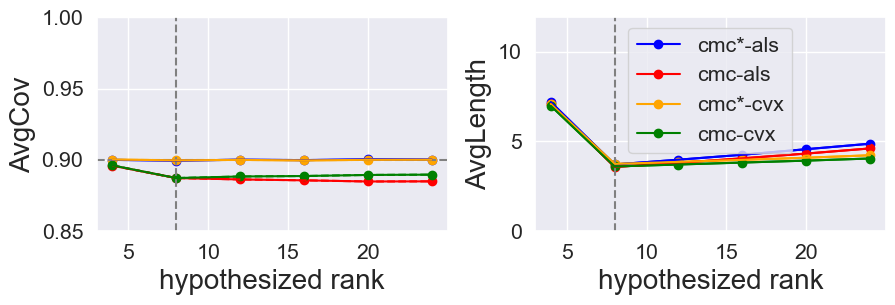

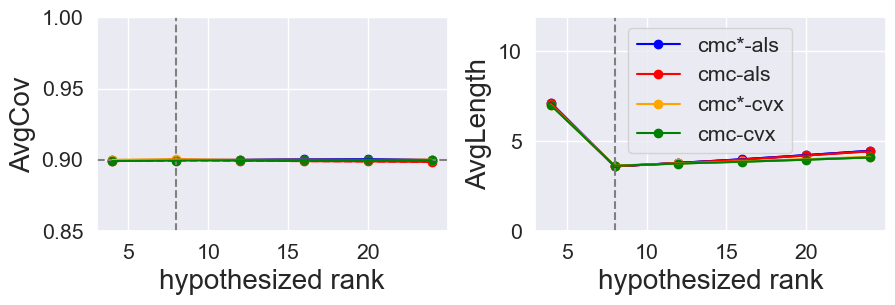

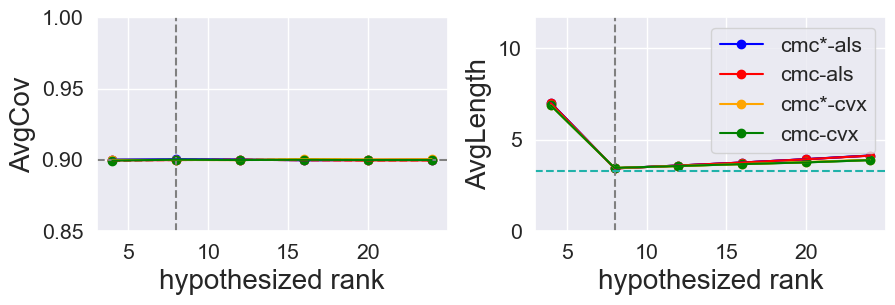

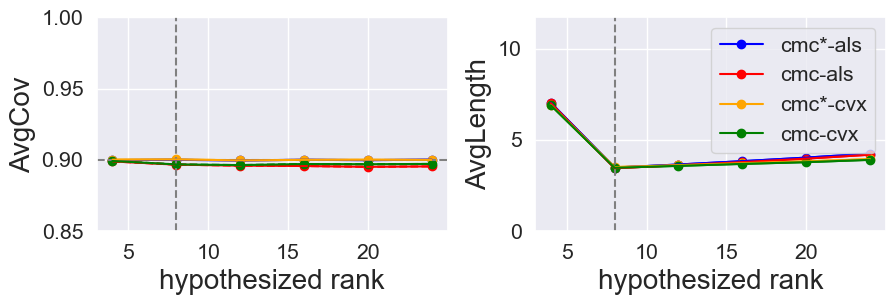

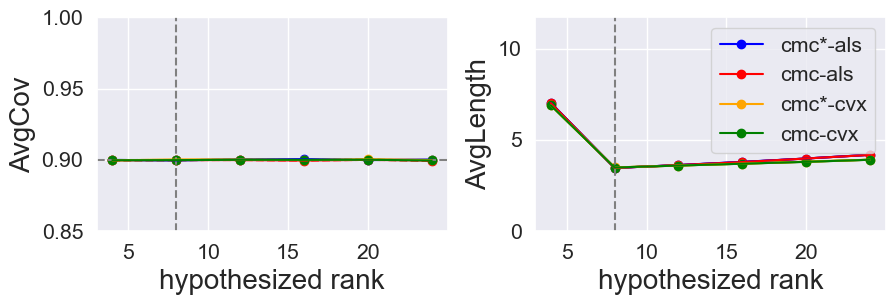

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# plot
alpha = 0.1
sd0 = 1
base1 = 'cvx'
base2 = 'als'
repN = 100
sigma_true=False
full_exp = True
k_star = 8
if full_exp:
    rk_seq = range(4,25,4)
    rk_x = 1
else:
    rk_seq = range(2,41,2)
    rk_x = 3

for d in [500]:
    d1 = d2 = d
    for het in ['logis1','logis2']:
        for mis_set in [0,4,5]:
            if mis_set==2:
                pr = 0.2
            else:
                pr = 0.8
            if mis_set==3:
                tail='t'
                sd = 0.5
            elif mis_set==4:
                tail='het'
                sd = sd0
            elif mis_set==5:
                tail='het1'
                sd=sd0
            else:
                tail='gaussian'
                sd = sd0
            cov_conf = np.zeros(len(rk_seq))
            cov_conf_hat = np.zeros(len(rk_seq))
            cov_als = np.zeros(len(rk_seq))
            cov_cvx = np.zeros(len(rk_seq))
            len_conf = np.zeros(len(rk_seq))
            len_conf_hat = np.zeros(len(rk_seq))
            len_als = np.zeros(len(rk_seq))
            len_cvx = np.zeros(len(rk_seq))

            sd_cov_conf = np.zeros(len(rk_seq))
            sd_cov_conf_hat = np.zeros(len(rk_seq))
            sd_cov_als = np.zeros(len(rk_seq))
            sd_cov_cvx = np.zeros(len(rk_seq))
            sd_len_conf = np.zeros(len(rk_seq))
            sd_len_conf_hat = np.zeros(len(rk_seq))
            sd_len_als = np.zeros(len(rk_seq))
            sd_len_cvx = np.zeros(len(rk_seq))
            for i_rk in range(len(rk_seq)):
                rk = rk_seq[i_rk]
                file_dir1 = '../results/hetero_cov_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+str(rk)+'_'+het+'_'+str(sd)+'_'+tail+'_'+str(sigma_true)+'_'+str(full_exp)+'.csv'
                file_dir2 = '../results/hetero_len_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+str(rk)+'_'+het+'_'+str(sd)+'_'+tail+'_'+str(sigma_true)+'_'+str(full_exp)+'.csv'
                cov_df = pd.read_csv(file_dir1)
                len_df = pd.read_csv(file_dir2)


                label1 = 'cmc*-'+base1
                label2 = 'cmc*-'+base2
                label3 = 'cmc-'+base1
                label4 = 'cmc-'+base2
                if full_exp:
                    nam_ = [label1]*repN + [label2]*repN + [label3]*repN + [label4]*repN
                else:
                    nam_ = [label2]*repN + [label4]*repN 
                cov_df['approach'] = nam_
                len_df['approach'] = nam_
                
                cov_conf_hat[i_rk] = cov_df[cov_df['approach']==label2].mean(axis=0)[0]
                cov_als[i_rk] = cov_df[cov_df['approach']==label4].mean(axis=0)[0]
                sd_cov_conf_hat[i_rk] = cov_df[cov_df['approach']==label2].sem(axis=0)[0]*np.sqrt(repN)
                sd_cov_als[i_rk] = cov_df[cov_df['approach']==label4].sem(axis=0)[0]*np.sqrt(repN)
                len_conf_hat[i_rk] = len_df[len_df['approach']==label2].mean(axis=0)[0]
                len_als[i_rk] = len_df[len_df['approach']==label4].mean(axis=0)[0]
                sd_len_conf_hat[i_rk] = len_df[len_df['approach']==label2].sem(axis=0)[0]*np.sqrt(repN)
                sd_len_als[i_rk] = len_df[len_df['approach']==label4].sem(axis=0)[0]*np.sqrt(repN)
                
                if full_exp:
                    cov_conf[i_rk] = cov_df[cov_df['approach']==label1].mean(axis=0)[0]
                    cov_cvx[i_rk] = cov_df[cov_df['approach']==label3].mean(axis=0)[0]               
                    sd_cov_conf[i_rk] = cov_df[cov_df['approach']==label1].sem(axis=0)[0]*np.sqrt(repN)              
                    sd_cov_cvx[i_rk] = cov_df[cov_df['approach']==label3].sem(axis=0)[0]*np.sqrt(repN)

                    len_conf[i_rk] = len_df[len_df['approach']==label1].mean(axis=0)[0]
                    len_cvx[i_rk] = len_df[len_df['approach']==label3].mean(axis=0)[0]
                    sd_len_conf[i_rk] = len_df[len_df['approach']==label1].sem(axis=0)[0]*np.sqrt(repN)
                    sd_len_cvx[i_rk] = len_df[len_df['approach']==label3].sem(axis=0)[0]*np.sqrt(repN)


            fig, ax = plt.subplots(ncols=2,figsize=(9,3))    
            fig.tight_layout(pad=1)
            sns.set(font_scale = 1.4)

            col_seq=['orange','blue','green','red']

            ax[0].plot(range(len(rk_seq)), cov_conf_hat, marker='o', label=label2, c=col_seq[1])
            ax[0].errorbar(range(len(rk_seq)), cov_conf_hat, yerr = sd_cov_conf_hat, c=col_seq[1])
            ax[0].plot(range(len(rk_seq)), cov_als, marker='o', label=label4, c=col_seq[3])
            ax[0].errorbar(range(len(rk_seq)), cov_als, yerr = sd_cov_als, c=col_seq[3],linestyle='--')
            if full_exp:
                ax[0].plot(range(len(rk_seq)), cov_conf, marker='o', label=label1, c=col_seq[0])
                ax[0].errorbar(range(len(rk_seq)), cov_conf, yerr = sd_cov_conf, c=col_seq[0])
                ax[0].plot(range(len(rk_seq)), cov_cvx, marker='o', label=label3, c=col_seq[2],linestyle='--')
                ax[0].errorbar(range(len(rk_seq)), cov_cvx, yerr = sd_cov_cvx, c=col_seq[2])
                ax[0].set_xticks([0.25,1.5,2.75,4],[5,10,15,20])
            else:
                ax[0].set_xticks([1.5,4,6.5,9,11.5,14,16.5,19],[5,10,15,20,25,30,35,40])
            ax[0].set_ylim((0.85,1))
            ax[0].set_xlabel('hypothesized rank',fontsize=20)
            ax[0].set_ylabel('AvgCov',fontsize=20)
            ax[0].axvline(x = rk_x, color = 'grey', linestyle = '--')
            ax[0].axhline(y = 1-alpha, color = 'grey', linestyle = '--')

            ax[1].plot(range(len(rk_seq)), len_conf_hat, marker='o', label=label2, c=col_seq[1])
            ax[1].errorbar(range(len(rk_seq)), len_conf_hat, yerr = sd_len_conf_hat, c=col_seq[1])
            ax[1].plot(range(len(rk_seq)), len_als, marker='o', label=label4, c=col_seq[3])
            ax[1].errorbar(range(len(rk_seq)), len_als, yerr = sd_len_als, c=col_seq[3])
        
            if full_exp:
                ax[1].plot(range(len(rk_seq)), len_conf, marker='o', label=label1, c=col_seq[0])
                ax[1].errorbar(range(len(rk_seq)), len_conf, yerr = sd_len_conf, c=col_seq[0])
                ax[1].plot(range(len(rk_seq)), len_cvx, marker='o', label=label3, c=col_seq[2])
                ax[1].errorbar(range(len(rk_seq)), len_cvx, yerr = sd_len_cvx, c=col_seq[2])
                ax[1].set_xticks([0.25,1.5,2.75,4],[5,10,15,20])
            else:
                ax[1].set_xticks([1.5,4,6.5,9,11.5,14,16.5,19],[5,10,15,20,25,30,35,40])
                
            ax[1].set_xlabel('hypothesized rank',fontsize=20)
            ax[1].set_ylabel('AvgLength',fontsize=20)
            ymax = max(len_conf_hat+len_als)/1.2
            ax[1].set_ylim((0,ymax))

            ax[1].axvline(x = rk_x, color = 'grey', linestyle = '--')
            ax[1].legend(loc='best',ncol=1)
            if tail=='gaussian':
                oracle_len = scipy.stats.norm.ppf(1-alpha/2,0,sd)
            elif tail=='t':
                oracle_len = sd * scipy.stats.t.ppf(1-alpha/2,1.2)
            if mis_set==0:
                ax[1].axhline(y = 2*oracle_len, color = 'lightseagreen', linestyle = '--', label='oracle')
            

            plot_dir = '../plot_paper/hetero_plot_rk_'+str(int(100*alpha))+'_'+str(mis_set)+'_'+str(k_star)+'_'+het+'_'+str(full_exp)+'.pdf'
            plt.savefig(plot_dir, bbox_inches='tight')

# Plot for sales dataset

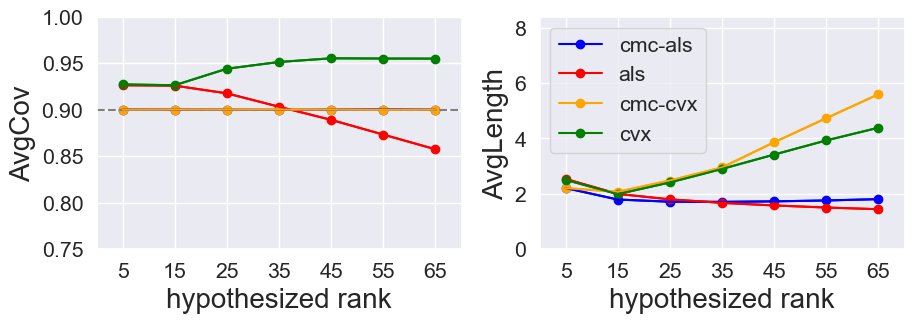

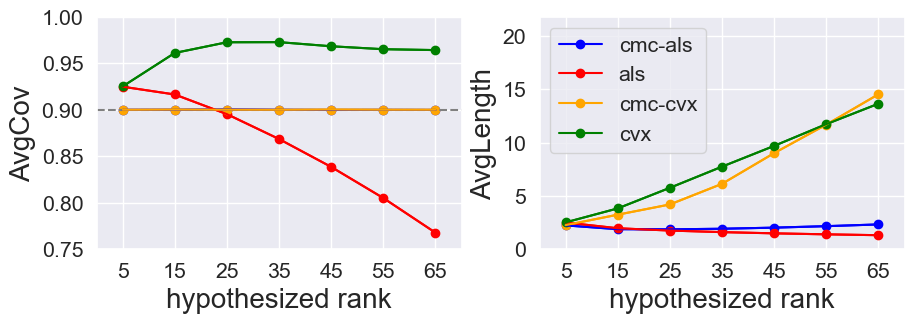

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# plot
alpha = 0.1
repN = 100
data_ = 'sale'
full_exp = True
if full_exp:
    rk_seq = [5,15,25,35,45,55,65]
else:
    rk_seq = np.arange(5,61,5)

for d in [500]:
    d1 = d2 = d
    for alpha in [0.1]:
        for pr in [0.8]:
            for het in ['homo','logis2']:
                cov_conf = np.zeros(len(rk_seq))
                cov_conf_hat = np.zeros(len(rk_seq))
                cov_als = np.zeros(len(rk_seq))
                cov_cvx = np.zeros(len(rk_seq))
                len_conf = np.zeros(len(rk_seq))
                len_conf_hat = np.zeros(len(rk_seq))
                len_als = np.zeros(len(rk_seq))
                len_cvx = np.zeros(len(rk_seq))

                sd_cov_conf = np.zeros(len(rk_seq))
                sd_cov_conf_hat = np.zeros(len(rk_seq))
                sd_cov_als = np.zeros(len(rk_seq))
                sd_cov_cvx = np.zeros(len(rk_seq))
                sd_len_conf = np.zeros(len(rk_seq))
                sd_len_conf_hat = np.zeros(len(rk_seq))
                sd_len_als = np.zeros(len(rk_seq))
                sd_len_cvx = np.zeros(len(rk_seq))
                for i_rk in range(len(rk_seq)):
                    rk = rk_seq[i_rk]
                    file_dir1 = '../results/'+data_+'_cov_'+str(alpha)+'_'+het+'_'+str(pr)+'_'+str(rk)+'_'+str(full_exp)+'.csv'
                    file_dir2 = '../results/'+data_+'_len_'+str(alpha)+'_'+het+'_'+str(pr)+'_'+str(rk)+'_'+str(full_exp)+'.csv'
                    cov_df = pd.read_csv(file_dir1)
                    len_df = pd.read_csv(file_dir2)

                    base1 = 'cvx'
                    base2 = 'als'

                    label1 = 'cmc-'+base1
                    label2 = 'cmc-'+base2
                    label3 = 'cvx'
                    label4 = 'als'
                    
                    if full_exp:
                        nam_ = [label1]*repN + [label2]*repN + [label3]*repN + [label4]*repN
                    else:
                        nam_ = [label2]*repN + [label4]*repN
                    cov_df['approach'] = nam_
                    len_df['approach'] = nam_
                    
                    
                    cov_conf_hat[i_rk] = cov_df[cov_df['approach']==label2].mean(axis=0)[0]
                    cov_als[i_rk] = cov_df[cov_df['approach']==label4].mean(axis=0)[0]
                    sd_cov_conf_hat[i_rk] = cov_df[cov_df['approach']==label2].sem(axis=0)[0]
                    sd_cov_als[i_rk] = cov_df[cov_df['approach']==label4].sem(axis=0)[0]

                    len_conf_hat[i_rk] = len_df[len_df['approach']==label2].mean(axis=0)[0]
                    len_als[i_rk] = len_df[len_df['approach']==label4].mean(axis=0)[0]
                    sd_len_conf_hat[i_rk] = len_df[len_df['approach']==label2].sem(axis=0)[0]
                    sd_len_als[i_rk] = len_df[len_df['approach']==label4].sem(axis=0)[0]
            
                    if full_exp:
                        cov_conf[i_rk] = cov_df[cov_df['approach']==label1].mean(axis=0)[0]
                        cov_cvx[i_rk] = cov_df[cov_df['approach']==label3].mean(axis=0)[0]
                        sd_cov_conf[i_rk] = cov_df[cov_df['approach']==label1].sem(axis=0)[0]
                        sd_cov_cvx[i_rk] = cov_df[cov_df['approach']==label3].sem(axis=0)[0]
                        len_conf[i_rk] = len_df[len_df['approach']==label1].mean(axis=0)[0]
                        len_cvx[i_rk] = len_df[len_df['approach']==label3].mean(axis=0)[0]
                        sd_len_conf[i_rk] = len_df[len_df['approach']==label1].sem(axis=0)[0]
                        sd_len_cvx[i_rk] = len_df[len_df['approach']==label3].sem(axis=0)[0]
            
            


                fig, ax = plt.subplots(ncols=2,figsize=(9,3))     
                fig.tight_layout(pad=0.6)
                sns.set(font_scale = 1.4)

                col_seq=['orange','blue','green','red']

                ax[0].plot(range(len(rk_seq)), cov_conf_hat, marker='o', label=label2, c=col_seq[1])
                ax[0].errorbar(range(len(rk_seq)), cov_conf_hat, yerr = sd_cov_conf_hat, c=col_seq[1])
                ax[0].plot(range(len(rk_seq)), cov_als, marker='o', label=label4, c=col_seq[3])
                ax[0].errorbar(range(len(rk_seq)), cov_als, yerr = sd_cov_als, c=col_seq[3])
                if full_exp:
                    ax[0].plot(range(len(rk_seq)), cov_conf, marker='o', label=label1, c=col_seq[0])
                    ax[0].errorbar(range(len(rk_seq)), cov_conf, yerr = sd_cov_conf, c=col_seq[0])
                    ax[0].plot(range(len(rk_seq)), cov_cvx, marker='o', label=label3, c=col_seq[2])
                    ax[0].errorbar(range(len(rk_seq)), cov_cvx, yerr = sd_cov_cvx, c=col_seq[2])
                
                ax[0].set_ylim((0.75,1))
                ax[0].set_xlim((-0.5,len(rk_seq)-0.5))
                ax[0].set_xlabel('hypothesized rank',fontsize=20)
                ax[0].set_ylabel('AvgCov',fontsize=20)
                ax[0].set_xticks(np.arange(0,len(rk_seq),1),rk_seq)
                ax[0].axhline(y = 1-alpha, color = 'grey', linestyle = '--')


                ax[1].plot(range(len(rk_seq)), len_conf_hat, marker='o', label=label2, c=col_seq[1])
                ax[1].errorbar(range(len(rk_seq)), len_conf_hat, yerr = sd_len_conf_hat, c=col_seq[1])
                ax[1].plot(range(len(rk_seq)), len_als, marker='o', label=label4, c=col_seq[3])
                ax[1].errorbar(range(len(rk_seq)), len_als, yerr = sd_len_als, c=col_seq[3])
                if full_exp:
                    ax[1].plot(range(len(rk_seq)), len_conf, marker='o', label=label1, c=col_seq[0])
                    ax[1].errorbar(range(len(rk_seq)), len_conf, yerr = sd_len_conf, c=col_seq[0])
                    ax[1].plot(range(len(rk_seq)), len_cvx, marker='o', label=label3, c=col_seq[2])
                    ax[1].errorbar(range(len(rk_seq)), len_cvx, yerr = sd_len_cvx, c=col_seq[2])
                    
                ax[1].set_xticks(np.arange(0,len(rk_seq),1),rk_seq)
                ax[1].set_xlabel('hypothesized rank',fontsize=20)
                ax[1].set_ylabel('AvgLength',fontsize=20)
                
                if full_exp:
                    ymax = max(len_conf)*1.5
                else:
                    ymax = max(len_conf_hat+len_als)/1
                    
                ax[1].set_ylim((0,ymax))
                ax[1].set_xlim((-0.5,len(rk_seq)-0.5))
                ax[1].legend(loc='best',ncol=1)

                plot_dir = '../plot_paper/'+data_+'_rk_'+str(int(100*alpha))+'_'+het+'_'+str(int(10*pr))+'_'+str(full_exp)+'.pdf'
                plt.savefig(plot_dir, bbox_inches='tight')